In [ ]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

!pip install rasterio 
import rasterio as rio

!pip install imagecodecs
import tifffile

# Install TensorFlow Decision Forests.
!pip3 install tensorflow_decision_forests --upgrade
import tensorflow_decision_forests as tfdf

from sklearn.model_selection import train_test_split

from google.colab import drive
from google.colab import files
drive.mount('/content/drive/')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 53.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.0/36.0 MB 33.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 69.4 MB/s eta 0:00:00
Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import math

import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import concatenate
import tifffile

from sklearn.model_selection import train_test_split

import os

import scipy

**Read Tiles Dataset**

In [ ]:
tiles = pd.read_csv(r'/content/drive/MyDrive/capstone/Tiles_no_binning_downsampled.csv')

In [ ]:
tiles.head(5)

,Tile_ID,Long2,Lat2,Long1,Lat1,Mid_lat,Mid_long,Stop_Signs,Paving_historical,Paving_future,Bus_stop,Collisions_Future,Collisions_Historical,RTTYP
0,266,-122.512166,37.779636,-122.511026,37.778732,37.779184,-122.511596,1.0,0.0,0.0,0.0,5.0,5.0,M
1,271,-122.512166,37.775118,-122.511026,37.774214,37.774666,-122.511596,4.0,0.0,0.0,0.0,1.0,3.0,M
2,275,-122.512166,37.771503,-122.511026,37.770600,37.771052,-122.511596,0.0,0.0,0.0,0.0,1.0,0.0,M
3,390,-122.511026,37.771503,-122.509885,37.770600,37.771052,-122.510456,0.0,0.0,0.0,1.0,1.0,1.0,M
4,391,-122.511026,37.770600,-122.509885,37.769696,37.770148,-122.510456,0.0,0.0,0.0,0.0,2.0,4.0,M


In [ ]:
tiles.columns

Index(['Tile_ID', 'Long2', 'Lat2', 'Long1', 'Lat1', 'Mid_lat', 'Mid_long',
       'Stop_Signs', 'Paving_historical', 'Paving_future', 'Bus_stop',
       'Collisions_Future', 'Collisions_Historical', 'RTTYP'],
      dtype='object')

In [ ]:
tiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tile_ID                3241 non-null   int64  
 1   Long2                  3241 non-null   float64
 2   Lat2                   3241 non-null   float64
 3   Long1                  3241 non-null   float64
 4   Lat1                   3241 non-null   float64
 5   Mid_lat                3241 non-null   float64
 6   Mid_long               3241 non-null   float64
 7   Stop_Signs             3241 non-null   float64
 8   Paving_historical      3241 non-null   float64
 9   Paving_future          3241 non-null   float64
 10  Bus_stop               3241 non-null   float64
 11  Collisions_Future      3241 non-null   float64
 12  Collisions_Historical  3241 non-null   float64
 13  RTTYP                  3241 non-null   object 
dtypes: float64(12), int64(1), object(1)
memory usage: 354.6+

In [ ]:
# x: 'Tile_ID', 'Long2', 'Lat2', 'Long1', 'Lat1', 'Mid_lat', 'Mid_long',
#    'Stop_Signs', 'Paving_historical', 'Paving_future', 'Bus_stop', 'Collisions_Historical'
# y: 'Collisions_Future'

X = tiles[['Tile_ID', 'Long2', 'Lat2', 'Long1', 'Lat1', 'Mid_lat', 'Mid_long',
           'Stop_Signs', 'Paving_historical', 'Paving_future', 'Bus_stop',
           'Collisions_Historical']]
y = tiles[['Collisions_Future']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/capstone/Satellite_Imagery/Satellite_Images_Tiled/' 

In [ ]:
with rio.open("/content/drive/MyDrive/capstone/Satellite_Imagery/Satellite_Images_Tiled/36.tif") as img :

    img1= img.read()[0:148, 0:188, :]

with rio.open("/content/drive/MyDrive/capstone/Satellite_Imagery/Satellite_Images_Tiled/37.tif") as img :

    img2= img.read()[0:148, 0:188, :]

with rio.open("/content/drive/MyDrive/capstone/Satellite_Imagery/Satellite_Images_Tiled/151.tif") as img :

    img3= img.read()[0:148, 0:188, :]

with rio.open("/content/drive/MyDrive/capstone/Satellite_Imagery/Satellite_Images_Tiled/15849.tif") as img :

    img4= img.read()[0:148, 0:188, :]


In [ ]:
#img1

In [ ]:
#img2

In [ ]:
#eda
#getting this error: ValueError: <COMPRESSION.LZW: 5> requires the 'imagecodecs' package

#img = tifffile.imread('/content/drive/MyDrive/capstone/Satellite_Imagery/Satellite_Images_Tiled/36.tif')[0:148, 0:188, :]
#img2 = tifffile.imread('/content/drive/MyDrive/capstone/Satellite_Imagery_Satellite_Images_Tiled/37.tif')[0:148, 0:188, :]

In [ ]:
np.shape(img1)

(4, 149, 189)

In [ ]:
np.shape(img2)

(4, 150, 189)

In [ ]:
np.shape(img3)

(4, 149, 189)

In [ ]:
np.shape(img4)

(4, 149, 189)

In [ ]:
# eda
test = []
test.append(img1[:, 0:148, 0:188])
test.append(img2[:, 0:148, 0:188])
print(np.shape(test))
test = np.stack(test)
print(np.shape(test))

(2, 4, 148, 188)
(2, 4, 148, 188)


In [ ]:
def preprocess_data_part1(IMAGE_PATH):
    """ Generate lists of images and labelsbased on temp_no_refer and temp_refer lists
    
    Params:
    -------
    IMAGE_PATH (str): path to directory with images.
    
    Returns:
    --------
    images_mini  (np.ndarray): Images of shape (N, 149 3)
    """
    
    data_mini = []
    
    for id in X_train['Tile_ID']:    
                    
        # read image and store as matrix            
        # Index at the end makes all images the same size (they sometimes differ by 1 pixel)
        with rio.open(IMAGE_PATH + str(id) + '.tif') as img :

            image = img.read()[0:148, 0:188, :]

        if np.shape(image) == (4, 150, 189):
        
        #image = tifffile.imread(IMAGE_PATH + str(id) + '.tif')[0:148, 0:188, :]
            
        # append to images
            data_mini.append(image)
 
    # stack images and trasnform to array
    images_mini = np.stack(data_mini)
    
    return images_mini

In [ ]:
# THERE IS ONE FILE IN THE "SATELLITE IMAGES TILED" FOLDER THAT IS NOT A TIF IMAGE, DELETE THIS FILE
images_mini = preprocess_data_part1(IMAGE_PATH)

In [ ]:
np.shape(images_mini)

(1538, 4, 150, 189)

Street Data Pre-Processing

In [ ]:
street = np.asarray(X_train[['Collisions_Historical', 'Mid_lat','Mid_long', 'Stop_Signs', 'Paving_historical', 'Bus_stop']]).astype('float32')
street_mini = []
for row in street:
    street_mini.append([[row]])
street_mini = np.stack(street_mini)
np.shape(street_mini)

(2617, 1, 1, 6)

**RANDOM FOREST DECISION TREE**

https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#regr = RandomForestRegressor(n_estimators = 100, random_state = 0)
#regr.fit(X_train, y_train.values.ravel())

#y_pred_rf = regr.predict(X_test)[:]

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from yellowbrick.model_selection import learning_curve

#rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
#print(learning_curve(rfc, X, y, cv=10, scoring='accuracy'))

In [ ]:
#dataset = tiles

#tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="label")

https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel

In [ ]:
rf_model_train = tfdf.keras.RandomForestModel(task=2)

rf_model_train.fit(np.asarray(X_train).astype('float32'),
    y_train,
    epochs=1,
    verbose=1,
    validation_split = 0.2)

Use /tmp/tmpv1rg7kzg as temporary training directory


Reading training dataset...


Training dataset read in 0:00:00.845499. Found 810 examples.
Training model...
Model trained in 0:00:01.722269
Compiling model...


Model compiled.


In [ ]:
print(rf_model_train.summary())

Model: "random_forest_model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (12):
	data:0.0
	data:0.1
	data:0.10
	data:0.11
	data:0.2
	data:0.3
	data:0.4
	data:0.5
	data:0.6
	data:0.7
	data:0.8
	data:0.9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "data:0.11"  0.424286 ################
    2.  "data:0.0"  0.191507 ####
    3. "data:0.10"  0.158213 ##
    4.  "data:0.5"  0.145693 #
    5.  "data:0.4"  0.144900 #
    6.  "data:0.7"  0.140987 #
    7.  "data:0.6"  0.140340 #
    8.  "data:0.2"  0.139234 #
    9.  "data:0.3"  0.136114 #
   10.  "data:0.1"  0.136024 #
   11.  "data:0.8"  0.111672 
   12.  "data:0.9"  0.110713 

Variable Importance: NUM_AS_ROOT:
    1. "data:0.11" 126.000000 ##

In [ ]:
rf_model_train.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=293, accuracy=None, loss=None, rmse=2.1014522607967234, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=806, accuracy=None, loss=None, rmse=1.775060590483685, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=810, accuracy=None, loss=None, rmse=1.7035848012144088, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=810, accuracy=None, loss=None, rmse=1.677524036793549, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=810, accuracy=None, loss=None, rmse=1.6705246420813735, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=810, accuracy=None, loss=None, rmse=1.669466137366843, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=61, evaluation=Eva

In [ ]:
rf_model_test = tfdf.keras.RandomForestModel(task=2)

rf_model_test.fit(np.asarray(X_test).astype('float32'),
    y_test,
    epochs=1,
    verbose=1,
    validation_split = 0.2)

Use /tmp/tmp1u5mkv2_ as temporary training directory


Reading training dataset...
Training dataset read in 0:00:01.036443. Found 1621 examples.
Training model...
Model trained in 0:00:03.163576
Compiling model...
Model compiled.


In [ ]:
print(rf_model_test.summary())

Model: "random_forest_model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (12):
	data:0.0
	data:0.1
	data:0.10
	data:0.11
	data:0.2
	data:0.3
	data:0.4
	data:0.5
	data:0.6
	data:0.7
	data:0.8
	data:0.9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "data:0.11"  0.412062 ################
    2. "data:0.10"  0.196799 #####
    3.  "data:0.0"  0.186690 ####
    4.  "data:0.7"  0.142627 ##
    5.  "data:0.6"  0.129439 #
    6.  "data:0.1"  0.128288 #
    7.  "data:0.4"  0.127031 #
    8.  "data:0.5"  0.126460 #
    9.  "data:0.3"  0.125229 #
   10.  "data:0.2"  0.124401 #
   11.  "data:0.8"  0.106102 
   12.  "data:0.9"  0.097139 

Variable Importance: NUM_AS_ROOT:
    1. "data:0.11" 116.00000

In [ ]:
rf_model_test.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=569, accuracy=None, loss=None, rmse=2.0349157723369813, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=1606, accuracy=None, loss=None, rmse=1.7023738841400302, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=1620, accuracy=None, loss=None, rmse=1.642299902802205, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=1621, accuracy=None, loss=None, rmse=1.6078333998986531, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=1621, accuracy=None, loss=None, rmse=1.596532182886899, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=1621, accuracy=None, loss=None, rmse=1.5933278076064192, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=61, evaluati

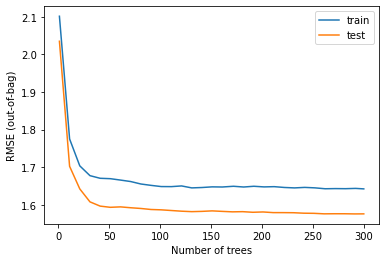

In [ ]:
import matplotlib.pyplot as plt

logs1 = rf_model_train.make_inspector().training_logs()
logs2 = rf_model_test.make_inspector().training_logs()

#plt.figure(figsize=(6, 6))

plt.plot([log.num_trees for log in logs1], [log.evaluation.rmse for log in logs1], label="train")
plt.plot([log.num_trees for log in logs2], [log.evaluation.rmse for log in logs2], label="test")
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.legend()
plt.show()

https://www.tensorflow.org/decision_forests/tutorials/model_composition_colab

**Gradient Boosted Decision Tree**

In [ ]:
gbt_model = tfdf.keras.GradientBoostedTreesModel()

gbt_model.fit(np.asarray(X_train).astype('float32'),
    y_train,
    epochs=1,
    verbose=1,
    validation_split = 0.2)

Use /tmp/tmp_asnvvwl as temporary training directory


Reading training dataset...
Training dataset read in 0:00:00.402826. Found 810 examples.
Training model...
Model trained in 0:00:01.716856
Compiling model...
Model compiled.


In [ ]:
print(gbt_model.summary())

Model: "gradient_boosted_trees_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (12):
	data:0.0
	data:0.1
	data:0.10
	data:0.11
	data:0.2
	data:0.3
	data:0.4
	data:0.5
	data:0.6
	data:0.7
	data:0.8
	data:0.9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "data:0.11"  0.541366 ################
    2.  "data:0.0"  0.240068 ##
    3. "data:0.10"  0.229150 #
    4.  "data:0.7"  0.225953 #
    5.  "data:0.4"  0.203956 
    6.  "data:0.5"  0.202414 
    7.  "data:0.2"  0.201248 
    8.  "data:0.8"  0.196562 
    9.  "data:0.1"  0.189204 
   10.  "data:0.3"  0.187868 
   11.  "data:0.6"  0.187129 
   12.  "data:0.9"  0.187098 

Variable Importance: NUM_AS_ROOT:
    1. "data:0.11" 2